Author: Alexander Criswell \<<alexander.criswell@ligo.org>\>

This the final analysis over results consistent with Petrov et al. (2022)'s projections for 4 years of observing at A+ sensitivity, with updated sky location handling and a three-detector network (HLV).

In [1]:
## point to my utils/analysis code
hbpmloc = '/mnt/c/Users/Alexander/Documents/LIGO/PM/HAYStack/'
## basic imports
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import scipy.stats as st
import matplotlib
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde as kde
from scipy.stats.mstats import mquantiles as mq
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde
from glob import glob
import pandas as pd
import sys 
import os
import pickle
from astropy import cosmology as co
from astropy.units import *
## Importing the accompanying utility and analysis files
sys.path.append(os.path.abspath(hbpmloc+'hbpm_utils/'))
from hbpm_utils import *
from importlib import reload
reload(sys.modules["hbpm_utils"])
from hbpm_utils import *
sys.path.append(hbpmloc)
from hbpm_analysis import run_analysis
reload(sys.modules["hbpm_analysis"])
from hbpm_analysis import run_analysis

## my preferred figure settings
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 12.0
matplotlib.rcParams['ytick.labelsize'] = 12.0
matplotlib.rcParams['axes.labelsize'] = 14.0
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])


Bad key "text.kerning_factor" on line 4 in
/home/alexander/miniconda3/envs/gwenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
post_bandwidth = 0.15
prior_bandwidth = 0.4

In [3]:
## load the sampled empirical relation coefficients
coeffs = pd.read_csv(hbpmloc+'/priors/sampled_empirical_relation_coefficients.tab',sep=' ')
bootstrap = coeffs.to_numpy()

## Preliminaries

In [4]:
## fine grid
fs = np.linspace(1.5,4,200)
Ms = np.linspace(0.8,1.8,200)

In [5]:
## get the Dietrich et al. (2020) multimessenger prior for R_1.6
Rs_mm, Rprior_kernel_mm, R16samples_mm = load_Rprior(hbpmloc+'/priors/R16_prior.txt',return_samples=True,plot=False)

## uniform prior, consider R on [9,15]
Rs = np.linspace(9,15,200)

In [6]:
uniform_Rprior = st.uniform(loc=Rs.min(),scale=(Rs.max()-Rs.min()))

## Analyses

In [7]:
priorfile = hbpmloc+'/priors/fprior.pickle'

In [8]:
savebase = './paper_data/analysis/Aplus_4yr_HLV'
database = './paper_data/bayeswave_fpeak_data/Aplus_4yr/'
seed = 170817

### Part 1

Running a hierarchical Bayesian post-merger analysis...
Loading priors...
Loading simulation data...
Generating event dictionary...


100%|==========| 178/178 [08:03<00:00,  2.72s/it]


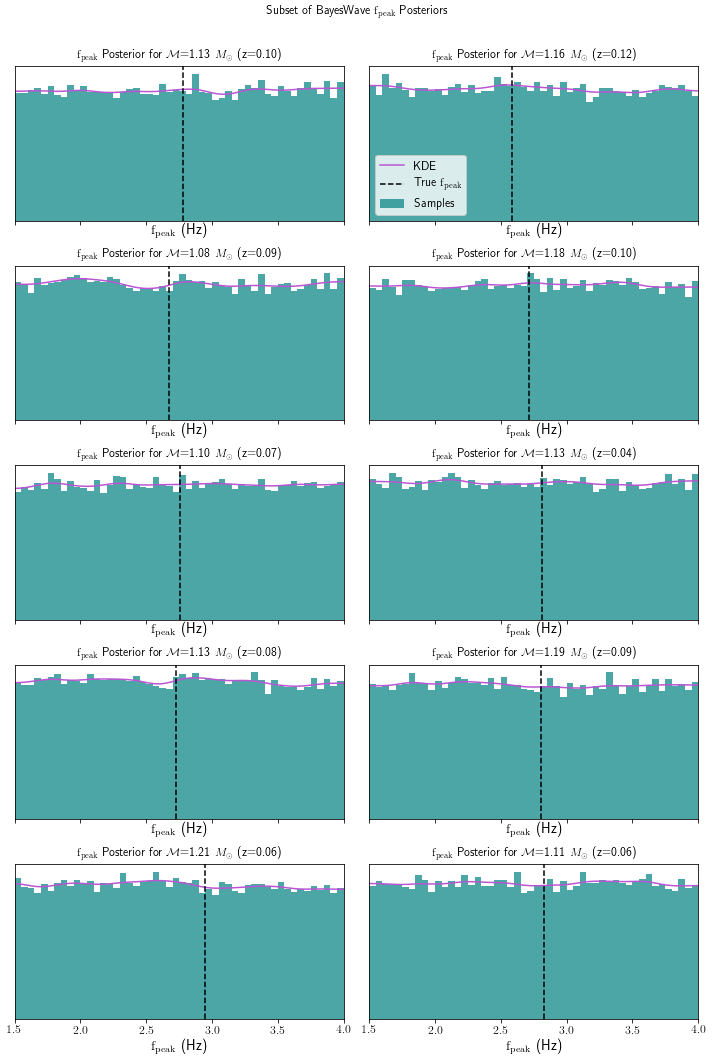

Computing likelihoods...


100%|==========| 178/178 [08:39<00:00,  2.92s/it]


Saving outputs to ././paper_data/analysis/Aplus_4yr_HLV_pt1/
Saved file to ././paper_data/analysis/Aplus_4yr_HLV_pt1//posterior_eventdict.pickle
Creating plots...


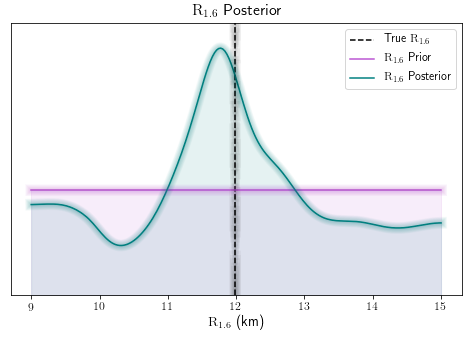

R_1.6 = 11.93 (+2.85,-2.76) km
Done!


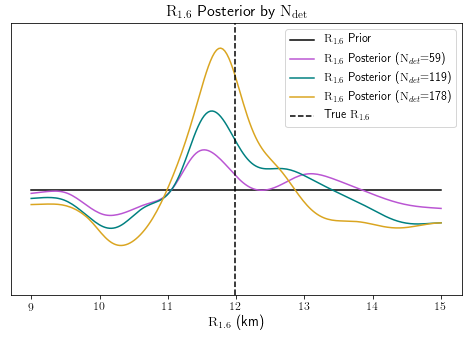

In [9]:
pt1_datadir = database+'/part1/'
Rs_pt1,likes_pt1,post_pt1,stats_pt1,postdict_pt1 = run_analysis(pt1_datadir,priorfile,
                                                                'uniform','sfhx',
                                                                hbpmloc+'/observing_run_sims/Aplus_4yr_events_pt1.csv',
                                                               hbpmloc+'/nr_files/sfhx_event_parameters.csv',
                                                               saveto='./'+savebase+'_pt1/',bootstrap=bootstrap,
                                                                 prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                ifos='H1,L1,V1',seed=seed,
                                                                z_adj='known',Mchirp_scaling='snr',aggregation='sum')

### Part 2

Running a hierarchical Bayesian post-merger analysis...
Loading priors...
Loading simulation data...
Generating event dictionary...


100%|==========| 179/179 [08:21<00:00,  2.80s/it]


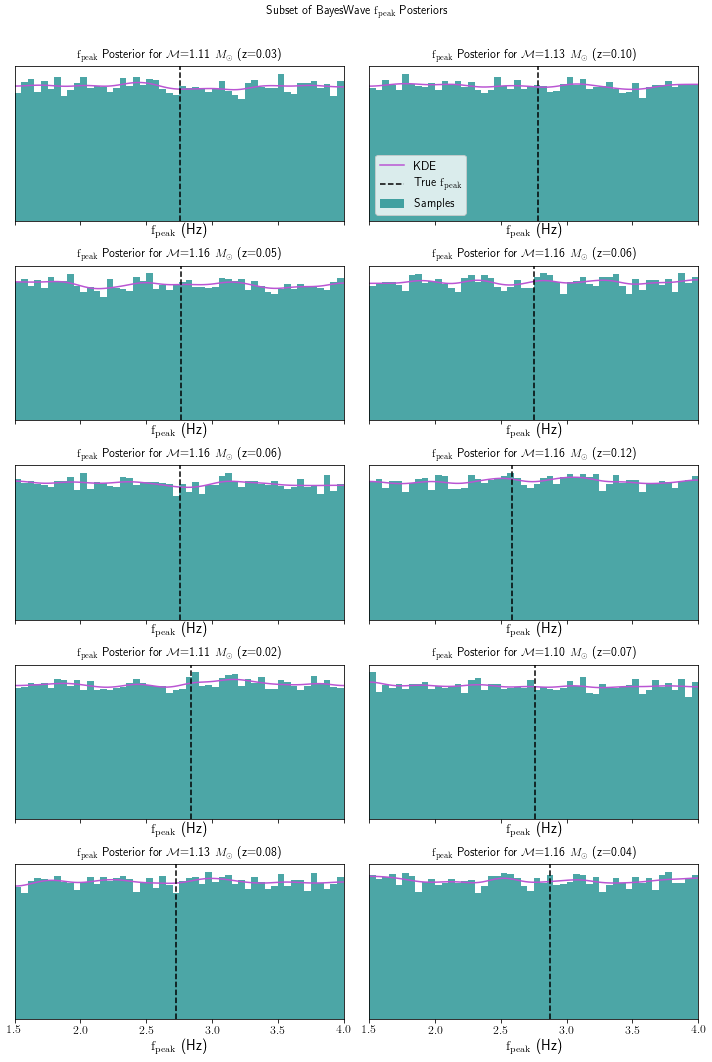

Computing likelihoods...


100%|==========| 179/179 [08:28<00:00,  2.84s/it]


Saving outputs to ././paper_data/analysis/Aplus_4yr_HLV_pt2/
Saved file to ././paper_data/analysis/Aplus_4yr_HLV_pt2//posterior_eventdict.pickle
Creating plots...


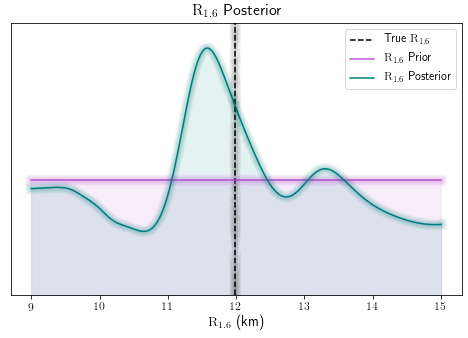

R_1.6 = 11.93 (+2.83,-2.77) km
Done!


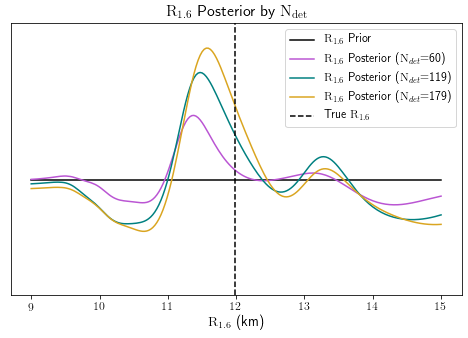

In [10]:
pt2_datadir = database+'/part2/'
Rs_pt2,likes_pt2,post_pt2,stats_pt2,postdict_pt2 = run_analysis(pt2_datadir,
                                                                     priorfile,
                                                                'uniform','sfhx',
                                                                hbpmloc+'/observing_run_sims/Aplus_4yr_events_pt2.csv',
                                                               hbpmloc+'/nr_files/sfhx_event_parameters.csv',
                                                               saveto='./'+savebase+'_pt2/',bootstrap=bootstrap,
                                                                 prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                ifos='H1,L1,V1',seed=seed,
                                                                z_adj='known',Mchirp_scaling='snr',aggregation='sum')

## Combined

In [11]:
Aplus_4yr_likes = [*likes_pt1,*likes_pt2]

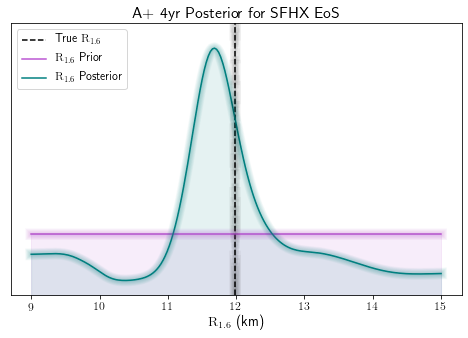

In [12]:
plt.figure()
ax = plt.gca()
plot_aggregate_posterior_on_ax(Rs,Aplus_4yr_likes,uniform_Rprior,Rtrue=11.98,ax=ax,legend_loc='upper left',
                         title='A+ 4yr Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
# plt.tight_layout()
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.pdf',bbox_inches='tight')
plt.show()

In [13]:
loadbase = '/paper_data/analysis/Aplus_4yr_HLV'

In [14]:
pt1_postdict = load_posterior_pickle('./'+loadbase+'_pt1/posterior_eventdict.pickle')

In [15]:
badkeys = ['eos', 'Rs', 'prior']

In [16]:
goodkeys_pt1 = [key for key in pt1_postdict.keys() if key not in badkeys]

In [17]:
unnormed_likes_pt1 = []
for key in goodkeys_pt1:
    unnormed_likes_pt1.append(pt1_postdict[key]['likelihood_i'])

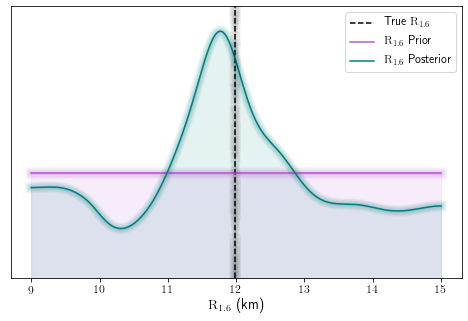

In [18]:
plot_aggregate_posterior(Rs,unnormed_likes_pt1,uniform_Rprior,Rtrue=11.98)

In [19]:
# help(load_posterior_pickle)
pt2_postdict = load_posterior_pickle('./'+loadbase+'_pt2/posterior_eventdict.pickle')

In [20]:
goodkeys_pt2 = [key for key in pt2_postdict.keys() if key not in badkeys]

In [21]:
unnormed_likes_pt2 = []
for key in goodkeys_pt2:
    unnormed_likes_pt2.append(pt2_postdict[key]['likelihood_i'])

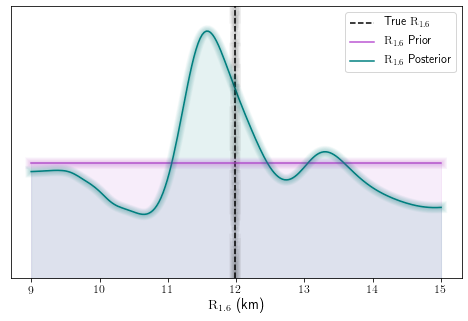

In [22]:
plot_aggregate_posterior(Rs,unnormed_likes_pt2,uniform_Rprior,Rtrue=11.98)

In [23]:
Aplus_4yr_likes_HL = [*unnormed_likes_pt1,*unnormed_likes_pt2]

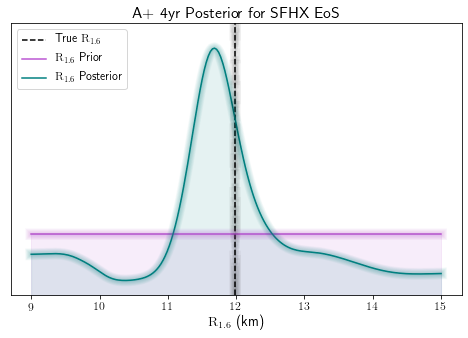

In [24]:
plt.figure()
ax = plt.gca()
plot_aggregate_posterior_on_ax(Rs,Aplus_4yr_likes_HL,uniform_Rprior,Rtrue=11.98,ax=ax,legend_loc='upper left',
                         title='A+ 4yr Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
# plt.tight_layout()
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.pdf',bbox_inches='tight')
plt.show()

In [25]:
prior_stats = get_post_stats(Rprior_kernel_mm.pdf(Rs)/np.sum(Rprior_kernel_mm.pdf(Rs)),Rs,latex=True)
sfhx_stats = get_post_stats(get_posterior(Rs,get_aggregate_likelihood(Aplus_4yr_likes),Rprior_kernel_mm),Rs,latex=True)

$\R=11.66^{+1.43}_{-0.98}$
$\R=11.65^{+1.01}_{-0.61}$


In [26]:
prior_range = prior_stats[2] - prior_stats[1]
sfhx_range = sfhx_stats[2] - sfhx_stats[1]

In [27]:
prior_range - sfhx_range

0.7920396019801004

In [28]:
(prior_range - sfhx_range)/prior_range

0.32905396983671986

In [29]:
get_post_stats(uniform_Rprior.pdf(Rs)/np.sum(uniform_Rprior.pdf(Rs)),Rs,latex=True)

$\R=12.00^{+2.85}_{-2.85}$


(11.999999999999996, 9.149707485374268, 14.849992499624982)

In [30]:
get_post_stats(get_posterior(Rs,get_aggregate_likelihood(Aplus_4yr_likes),uniform_Rprior),Rs,latex=True)

$\R=11.85^{+2.72}_{-2.63}$


(11.848682604099386, 9.223211160558028, 14.570078503925195)

Just a check: look at what happens when we remove the most nearby events.

In [31]:
cut = 100 #Mpc
farkeys_pt1 = [key for key in goodkeys_pt1 if float(key.split('_')[1].split('-')[0])>cut]
farkeys_pt2 = [key for key in goodkeys_pt2 if float(key.split('_')[1].split('-')[0])>cut]
farlikes_pt1 = [pt1_postdict[key]['likelihood_i'] for key in farkeys_pt1]
farlikes_pt2 = [pt2_postdict[key]['likelihood_i'] for key in farkeys_pt2]

In [32]:
pt1_postdict[goodkeys_pt1[2]].keys()
for key1,key2 in zip(goodkeys_pt1,goodkeys_pt2):
    if pt1_postdict[key1]['dist'] < 100:
        print(key1)
    if pt2_postdict[key2]['dist'] < 100:
        print(key2)

127149_98.72
129135_53.16
132132_96.90
133139_61.55


Look at the closest (presumeably best) individual posterior:

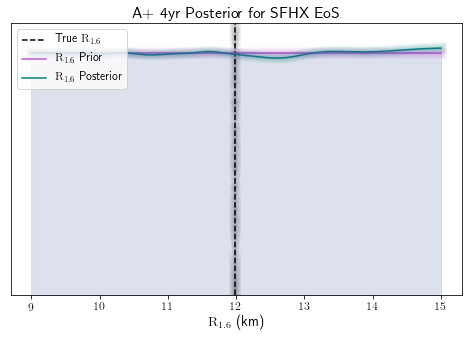

In [33]:
plt.figure()
ax = plt.gca()
plot_aggregate_posterior_on_ax(Rs,[pt2_postdict['129135_53.16']['likelihood_i']],uniform_Rprior,Rtrue=11.98,ax=ax,legend_loc='upper left',
                         title='A+ 4yr Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
# plt.tight_layout()
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.pdf',bbox_inches='tight')
plt.show()

In [34]:
Aplus_4yr_farlikes = [*farlikes_pt1,*farlikes_pt2]

In [35]:
len(Aplus_4yr_likes) - len(Aplus_4yr_farlikes)

4

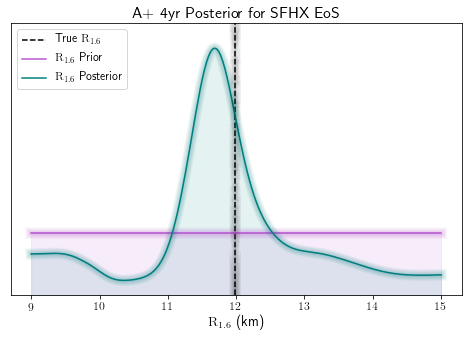

In [36]:
plt.figure()
ax = plt.gca()
# plot_aggregate_posterior_on_ax(Rs,likes_sly4,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper left',
#                          title='O4+O5 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,Aplus_4yr_farlikes,uniform_Rprior,Rtrue=11.98,ax=ax,legend_loc='upper left',
                         title='A+ 4yr Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# plot_aggregate_posterior_on_ax(Rs,likes_dd2,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper left',
#                          title='O4+O5 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
# plt.tight_layout()
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.png',bbox_inches='tight')
# plt.savefig('../paper/figures/O4O5_allEoS_3panel_witherr.pdf',bbox_inches='tight')
plt.show()

The result is largely unchanged! Confirmation that we are not being severely dominated by nearby, loud events and are in fact accruing small bits of information from across the entire dataset.